# 1. Import Libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from scipy.stats import ttest_ind, chi2_contingency

# 2. Load the Dataset

In [45]:
df = pd.read_excel("https://raw.githubusercontent.com/Matiin-heidari/churn-prediction/main/data.xlsx")
# df = pd.read_excel('data.xlsx')

# 3. Exploratory Data Analysis

Dataset Head:

In [46]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001.0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002.0,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003.0,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004.0,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005.0,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


Dataset Info:

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5628 non-null   float64
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5628 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Dataset Description:

In [48]:
df.describe(include='all')

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5628.000000,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5628,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,NaN,NaN,4,NaN,NaN,7,2,NaN,NaN,6,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2763,NaN,NaN,2314,3383,NaN,NaN,2050,NaN,2984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52814.549041,0.168384,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,532.401057
std,1624.890759,0.374240,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,18842.837049
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51407.750000,0.000000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52814.500000,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.330000
75%,54221.250000,0.000000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.422500


Analyze target variable distribution. Churn flag distribution:

In [50]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.831616
1,0.168384


Analyze and visualize key features related to churn such as Tenure, DaySinceLastOrder, SatisfactionScore, and Complain using Histograms, Box plots, and count plots.

Text(0.5, 1.0, 'Tenure Distribution')

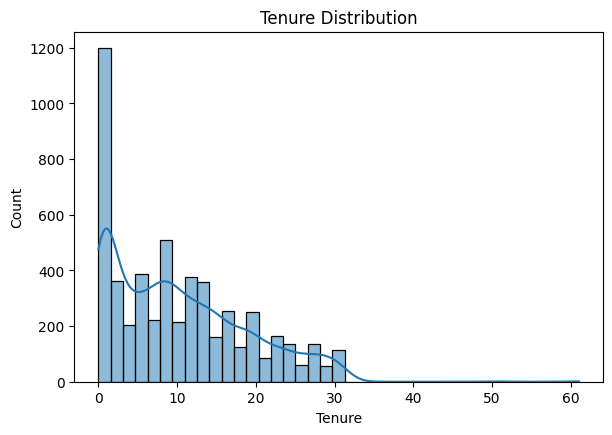

In [51]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['Tenure'], kde=True)
plt.title('Tenure Distribution')

Text(0.5, 1.0, 'Tenure vs Churn')

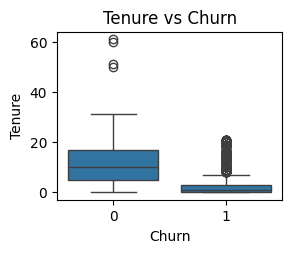

In [52]:
plt.subplot(2, 2, 2)
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Tenure vs Churn')

Text(0.5, 1.0, 'Day Since Last Order Distribution')

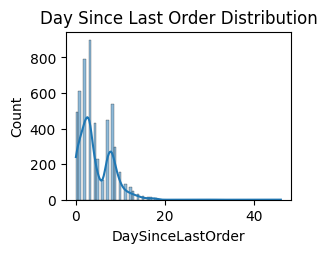

In [53]:
plt.subplot(2, 2, 3)
sns.histplot(df['DaySinceLastOrder'], kde=True)
plt.title('Day Since Last Order Distribution')

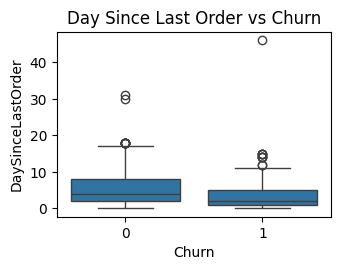

In [54]:
plt.subplot(2, 2, 4)
sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df)
plt.title('Day Since Last Order vs Churn')
plt.tight_layout()
plt.show()

Categorical features visualization:

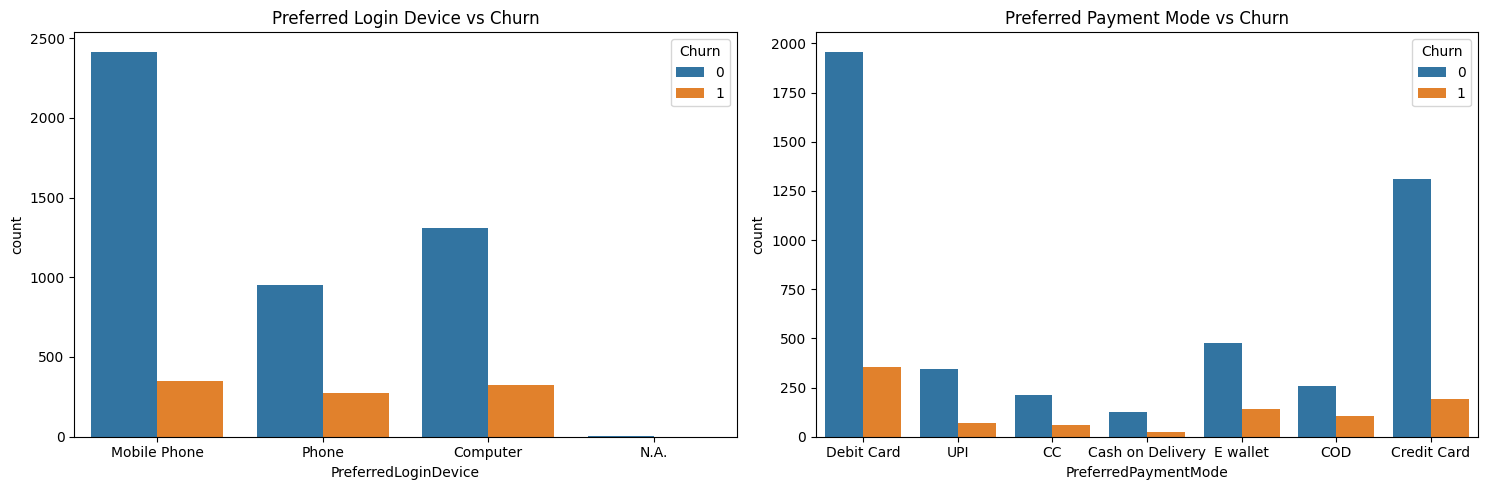

In [55]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='PreferredLoginDevice', hue='Churn', data=df)
plt.title('Preferred Login Device vs Churn')
plt.subplot(1, 2, 2)
sns.countplot(x='PreferredPaymentMode', hue='Churn', data=df)
plt.title('Preferred Payment Mode vs Churn')
plt.tight_layout()
plt.show()

# 4. Data Preparation and Cleaning

Check for missing values:

In [56]:
df.isnull().sum()

,0
CustomerID,2
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,2
HourSpendOnApp,255
NumberOfDeviceRegistered,0


Handle missing values: Impute numerical with median/mean, categorical with mode

In [58]:
for col in ['HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'Tenure', "WarehouseToHome"]:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

for col in ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'MaritalStatus', 'PreferedOrderCat']:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])


Missing Values after imputation:

In [59]:
df.isnull().sum()

,0
CustomerID,2
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0


Drop CustomerID as it's not a feature for the model and Ensure Churn is numeric (0 or 1)

In [60]:
df = df.drop('CustomerID', axis=1)

df['Churn'] = df['Churn'].astype(int)

# 5. Features Selection (Based on "significance tests" )

Separate features (X) and target (y)

In [61]:
X = df.drop('Churn', axis=1)
y = df['Churn']

Identify numerical and categorical columns

In [62]:
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include='object').columns

Apply T-test for numerical variables.

T-test for Numerical Variables (p-value <= 0.05 indicates significance):

In [65]:
significant_numerical_features = []
for col in numerical_cols:
    group_churn = df[df['Churn'] == 1][col].dropna()
    group_no_churn = df[df['Churn'] == 0][col].dropna()
    # Ensure groups have enough data for t-test
    if len(group_churn) > 1 and len(group_no_churn) > 1:
        stat, p_value = ttest_ind(group_churn, group_no_churn)
        if p_value <= 0.05: #
            significant_numerical_features.append(col)
            print(f"  {col}: p-value = {p_value:.4f} (Significant)")
        else:
            print(f"  {col}: p-value = {p_value:.4f} (Not Significant)")
    else:
        print(f"  {col}: Not enough data in churn/no-churn groups for T-test.")

  Tenure: p-value = 0.0000 (Significant)
  CityTier: p-value = 0.0000 (Significant)
  WarehouseToHome: p-value = 0.0000 (Significant)
  HourSpendOnApp: p-value = 0.1581 (Not Significant)
  NumberOfDeviceRegistered: p-value = 0.0000 (Significant)
  SatisfactionScore: p-value = 0.0000 (Significant)
  NumberOfAddress: p-value = 0.0010 (Significant)
  Complain: p-value = 0.0000 (Significant)
  OrderAmountHikeFromlastYear: p-value = 0.5956 (Not Significant)
  CouponUsed: p-value = 0.9146 (Not Significant)
  OrderCount: p-value = 0.0713 (Not Significant)
  DaySinceLastOrder: p-value = 0.0000 (Significant)
  CashbackAmount: p-value = 0.5051 (Not Significant)


Chi-square Test for Categorical Variables (p-value <= 0.05 indicates significance):

In [66]:
significant_categorical_features = []
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    if p_value <= 0.05: #
        significant_categorical_features.append(col)
        print(f"  {col}: p-value = {p_value:.4f} (Significant)")
    else:
        print(f"  {col}: p-value = {p_value:.4f} (Not Significant)")

  PreferredLoginDevice: p-value = 0.0000 (Significant)
  PreferredPaymentMode: p-value = 0.0000 (Significant)
  Gender: p-value = 0.0318 (Significant)
  PreferedOrderCat: p-value = 0.0000 (Significant)
  MaritalStatus: p-value = 0.0000 (Significant)


Combine significant features

In [67]:
selected_features = list(set(significant_numerical_features + significant_categorical_features))
X_selected = X[selected_features]
print(f"\nSelected features after significance tests: {selected_features}")


Selected features after significance tests: ['PreferredLoginDevice', 'Complain', 'Gender', 'SatisfactionScore', 'DaySinceLastOrder', 'WarehouseToHome', 'NumberOfAddress', 'NumberOfDeviceRegistered', 'PreferredPaymentMode', 'CityTier', 'Tenure', 'PreferedOrderCat', 'MaritalStatus']


# 6. Data Partitioning and Balancing

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42, stratify=y)

In [32]:
print(f"Original training set shape: {X_train.shape}, Churn distribution: {Counter(y_train)}")

Original training set shape: (3941, 13), Churn distribution: Counter({0: 3277, 1: 664})


Stratified Undersampling on Training Set

In [70]:
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

print(f"Resampled training set shape: {X_train_resampled.shape}, Churn distribution: {Counter(y_train_resampled)}")

Resampled training set shape: (1328, 13), Churn distribution: Counter({0: 664, 1: 664})


# 7. Model Development

Preprocessing for the models: numerical scaling and one-hot encoding for categorical.

Only apply to the selected features that are actually in X_train_resampled

In [72]:
numerical_cols_after_selection = X_train_resampled.select_dtypes(include=np.number).columns
categorical_cols_after_selection = X_train_resampled.select_dtypes(include='object').columns

In [73]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_after_selection),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_after_selection)
    ])

Models to compare

In [74]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000) # Increased max_iter for convergence
}

In [75]:
trained_models = {}
results = {'Model': [], 'Accuracy': [], 'AUC': []}

Logistic Regression - Accuracy: 0.7756, AUC: 0.8701


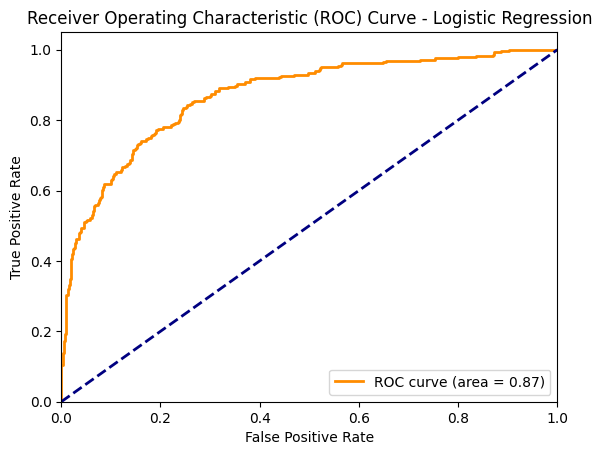

Decision Tree - Accuracy: 0.8259, AUC: 0.8546


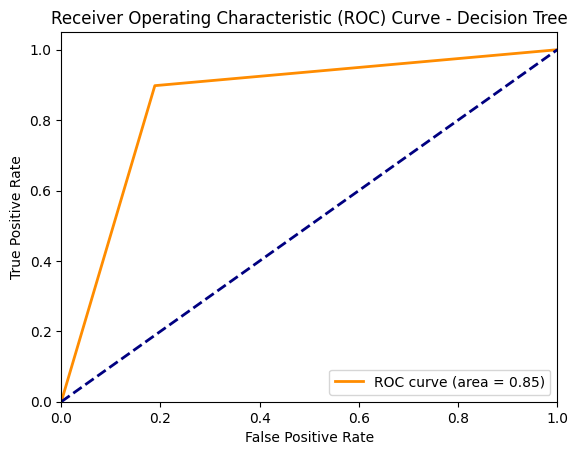

Random Forest - Accuracy: 0.9076, AUC: 0.9704


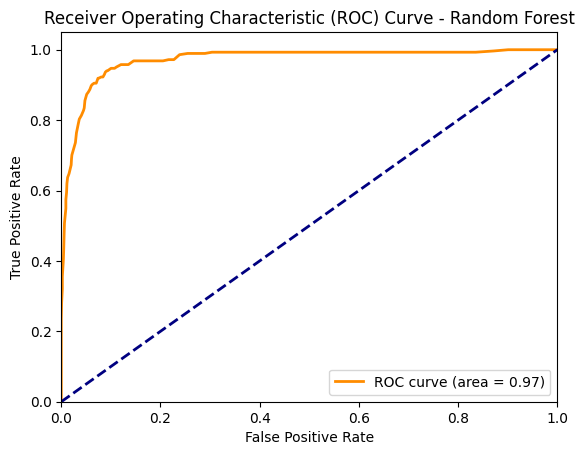

Gradient Boosting - Accuracy: 0.8514, AUC: 0.9317


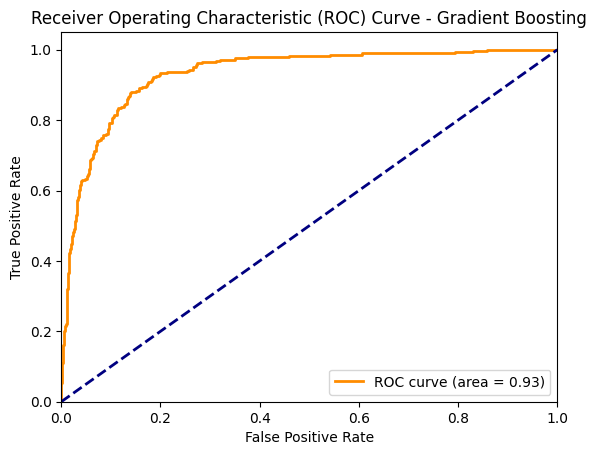

Neural Network - Accuracy: 0.8549, AUC: 0.9408


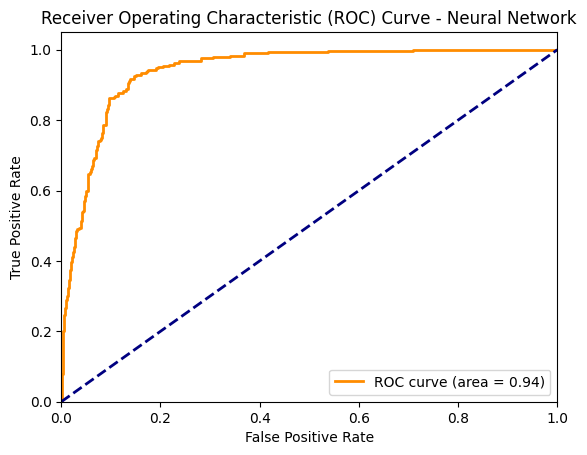

In [76]:
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    pipeline.fit(X_train_resampled, y_train_resampled)
    trained_models[name] = pipeline

    # Evaluate on the test set
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['AUC'].append(roc_auc)

    print(f"{name} - Accuracy: {accuracy:.4f}, AUC: {roc_auc:.4f}")

    # Plot ROC curve for visual inspection
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()

# 8. Model Results and Business Insights

Model Comparison:

In [78]:
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,AUC
0,Logistic Regression,0.775607,0.870092
1,Decision Tree,0.825933,0.854638
2,Random Forest,0.907638,0.970439
3,Gradient Boosting,0.851391,0.931738
4,Neural Network,0.854944,0.940833


Choose the best model based on AUC

In [79]:
best_model_name = results_df.loc[results_df['AUC'].idxmax()]['Model']
best_model_pipeline = trained_models[best_model_name]
print(f"\nBest performing model: {best_model_name}")


Best performing model: Random Forest


In [80]:
# Apply the best model to the entire dataset (or a new unseen dataset) to predict churn probability
# For this example, we'll apply the best model to the original X_selected for demonstration
df['Churn_Probability'] = best_model_pipeline.predict_proba(X_selected)[:, 1]

In [81]:
# Segment customers into churn classes based on probability (e.g., quartiles)
df['Churn_Class'] = pd.qcut(df['Churn_Probability'], q=4, labels=['Very Low', 'Low', 'Medium', 'High']) # Example 4 classes
print("\nChurn Class Distribution:\n")
df['Churn_Class'].value_counts(normalize=True)


Churn Class Distribution:



,proportion
Churn_Class,
Very Low,0.262522
High,0.249201
Medium,0.248135
Low,0.240142


In [ ]:
# Analyze characteristics of high churn customers (business insights)
high_churn_customers = df[df['Churn_Class'] == 'High']

Characteristics of High Churn Customers (sample):

In [82]:
high_churn_customers.describe(include='all')

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn_Probability,Churn_Class
count,1403.000000,1403.000000,1403,1403.00000,1403.000000,1403,1403,1403.000000,1403.000000,1403,...,1403,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403
unique,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Mobile Phone,...,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
freq,NaN,NaN,495,NaN,NaN,519,897,NaN,NaN,529,...,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1403
mean,0.667142,3.632929,NaN,1.75980,16.508197,NaN,NaN,2.935139,3.845331,NaN,...,NaN,4.260157,0.509622,15.545260,1.582324,2.597292,3.068425,158.087534,0.817249,NaN
std,0.471404,5.180064,NaN,0.94953,8.115371,NaN,NaN,0.665589,1.032785,NaN,...,NaN,2.747849,0.500086,3.666547,1.711595,2.512660,3.005871,36.632004,0.163365,NaN
min,0.000000,0.000000,NaN,1.00000,5.000000,NaN,NaN,1.000000,1.000000,NaN,...,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.480000,NaN
25%,0.000000,0.000000,NaN,1.00000,10.000000,NaN,NaN,2.000000,3.000000,NaN,...,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,1.000000,131.670000,0.690000,NaN
50%,1.000000,1.000000,NaN,1.00000,14.000000,NaN,NaN,3.000000,4.000000,NaN,...,NaN,3.000000,1.000000,14.000000,1.000000,2.000000,3.000000,149.130000,0.880000,NaN
75%,1.000000,6.000000,NaN,3.00000,22.000000,NaN,NaN,3.000000,4.000000,NaN,...,NaN,6.000000,1.000000,18.000000,2.000000,2.000000,4.000000,170.335000,0.960000,NaN


Common Preferred Payment Mode for High Churners:

In [83]:
high_churn_customers['PreferredPaymentMode'].value_counts(normalize=True)

,proportion
PreferredPaymentMode,
Debit Card,0.369922
Credit Card,0.237349
E wallet,0.122594
COD,0.103350
CC,0.074840
UPI,0.073414
Cash on Delivery,0.018532


Common Preferred Order Category for High Churners:

In [84]:
high_churn_customers['PreferedOrderCat'].value_counts(normalize=True)

,proportion
PreferedOrderCat,
Mobile Phone,0.377049
Mobile,0.247327
Laptop & Accessory,0.221668
Fashion,0.121169
Others,0.017106
Grocery,0.015681


Average Day Since Last Order for High Churners:

In [85]:
high_churn_customers['DaySinceLastOrder'].mean()

np.float64(3.068424803991447)

Average Tenure for High Churners:

In [86]:
high_churn_customers['Tenure'].mean()

np.float64(3.6329294369208838)

feature importances:

In [88]:
feature_names = best_model_pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = best_model_pipeline.named_steps['classifier'].feature_importances_
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("\nFeature Importances (Top 10) from Random Forest:\n", feature_importances.head(10))



Feature Importances (Top 10) from Random Forest:
 num__Tenure                                 0.268154
num__WarehouseToHome                        0.088327
num__DaySinceLastOrder                      0.082660
num__Complain                               0.074071
num__NumberOfAddress                        0.072091
num__SatisfactionScore                      0.062004
num__NumberOfDeviceRegistered               0.041477
num__CityTier                               0.029542
cat__PreferedOrderCat_Laptop & Accessory    0.024216
cat__MaritalStatus_Single                   0.022946
dtype: float64


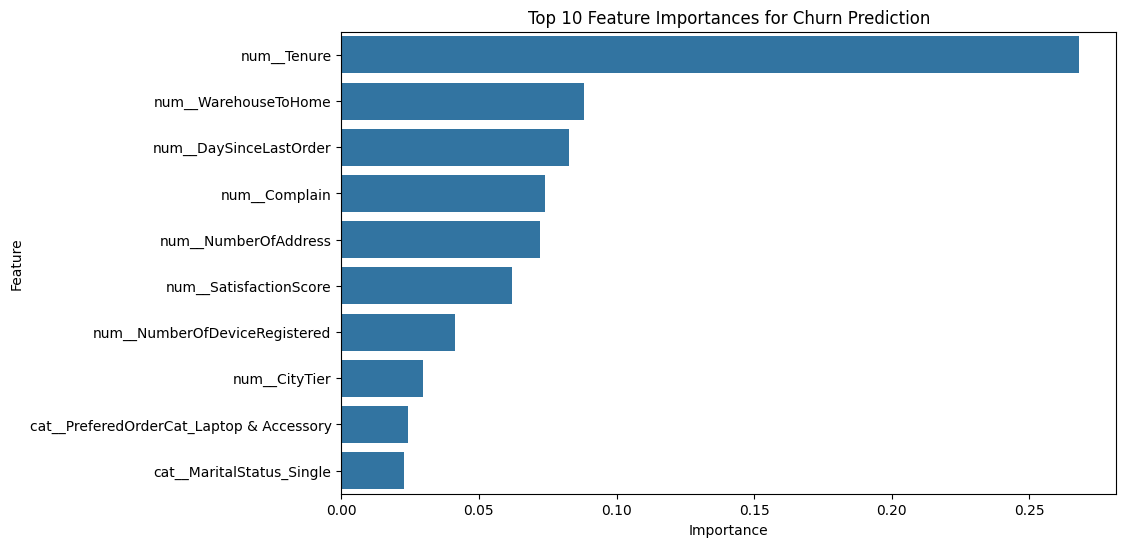

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.head(10).values, y=feature_importances.head(10).index)
plt.title('Top 10 Feature Importances for Churn Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
